<a href="https://cognitiveclass.ai"></a>

<h1 align=center><font size = 5>Clustering the Neighbourhoods of Data Science Companies in US</font></h1>

## Importing the Necessary Modules

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

US_Companies data set contains more than 500 company details. In order to segement the neighborhoods of the selected domain companies and explore them, we will essentially need a dataset that contains the city and state details of the selected domain companies in United States and then we can explore them

Luckily, this dataset exists for free on the web. Link is as follows: http://www.opendata500.com/us/download/us_companies.csv

For my convenience, I have  downloaded the files and placed the csv file in the project directory, so that i can directly access the data

In [2]:
#!wget -q -O 'us_companies.csv' http://www.opendata500.com/us/download/us_companies.csv
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [3]:
df=pd.read_csv('us_companies.csv')

Let's take a quick look at the data.

In [4]:
df.head()

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,Finance & Investment,Financial Services,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


Notice how all the relevant data is in the *df* key, which is basically a list of all the company details. So, let' look at the columns

In [5]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

Let's take a look at the first  5 item in this list.

In [6]:
df.head()

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,Finance & Investment,Financial Services,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


#### Tranform the data into a *processable* dataframe

The next task is essentially transforming this data into a  *processable* dataframe. So let's start

#### Replace the Mismatch Values

Data/Technology and Housing/Real Estate columns has similar type of entries and can be differentiated only by , values

In [7]:
df.replace(to_replace='Data/Technology,',value='Data/Technology',inplace=True)

In [8]:
df.replace(to_replace='Housing/Real Estate,',value='Housing/Real Estate',inplace=True)

#### Visualize the different company categories and their count using bar chart

I have created new data frame that contains the value count of each values in company_category column

In [9]:
catego=df['company_category'].value_counts().to_frame()

In [10]:
catego.reset_index(inplace=True)

In [11]:
catego.head()

,index,company_category
0,Data/Technology,98
1,Finance & Investment,75
2,Business & Legal Services,44
3,Governance,43
4,Healthcare,40


In [12]:
catego.rename(columns={'index':'Category','company_category':'count'},inplace=True)

In [13]:
import matplotlib.pyplot as plt

### Lets create a barchar and visualize it 

<BarContainer object of 18 artists>

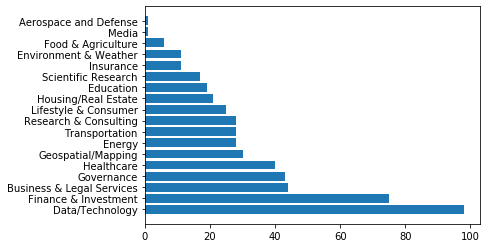

In [14]:
plt.barh(catego['Category'],catego['count'])

In [15]:
catego.head()

,Category,count
0,Data/Technology,98
1,Finance & Investment,75
2,Business & Legal Services,44
3,Governance,43
4,Healthcare,40


### Remove the unnecessary info that is not needed when we process the data frame

In [16]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

In [17]:
df.drop(columns=['company_name_id','url','country','social_impact','last_updated','source_count','description_short','social_impact','example_uses'],inplace=True)

In [18]:
df.head()

,company_name,year_founded,city,state,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,description,data_types,data_impacts,financial_info
0,"3 Round Stones, Inc.",2010.0,Washington,DC,20004.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",3 Round Stones produces a platform for publish...,NaN,[],"3 Round Stones is a profitable, self-funded, w..."
1,48 Factoring Inc.,2014.0,Philadelphia,PA,19087.0,51-200,Private,Finance & Investment,Financial Services,Business to Business,The company mission is to provide finance to s...,Business,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN
2,5PSolutions,2007.0,Fairfax,VA,22003.0,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...","At 5PSolutions, we wish to make all basic info...",NaN,[],NaN
3,Abt Associates,1965.0,Cambridge,MA,2138.0,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,"Abt Associates is a mission-driven, internatio...",NaN,[],Employee-owned company. $552M/year.
4,Accela,1999.0,San Ramon,CA,94583.0,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,Accela powers thousands of services and millio...,"Health/Healthcare, Housing, Public Safety",[],NaN


In [19]:
df.drop(columns=['financial_info','data_types','description'],inplace=True)

### Drop rows that contains NAN Values 

Our main column is city and company. Since the number of rows that has NAN values in these columns are less, we can simply remove those rows

In [20]:
df.dropna(subset=['company_category','city'],axis=0,inplace=True)

In [21]:
df.isnull().sum(axis=0)

company_name            0
year_founded            0
city                    0
state                   0
zip_code               11
full_time_employees    23
company_type           11
company_category        0
revenue_source          6
business_model         69
data_impacts            0
dtype: int64

In [22]:
df.shape

(493, 11)

In [23]:
df.columns

Index(['company_name', 'year_founded', 'city', 'state', 'zip_code',
       'full_time_employees', 'company_type', 'company_category',
       'revenue_source', 'business_model', 'data_impacts'],
      dtype='object')

### Creating new *Features* data frame that is  Company_data

In [24]:
company_data=df[['company_name','city','state','company_type','company_category']]

In [25]:
company_data.head()

,company_name,city,state,company_type,company_category
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment
2,5PSolutions,Fairfax,VA,Private,Data/Technology
3,Abt Associates,Cambridge,MA,Private,Research & Consulting
4,Accela,San Ramon,CA,Private,Governance


In [26]:
company_data[['CategoryLabel']]=company_data[['company_category']]

C:\Users\Prabhu_Mayilsamy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [27]:
company_data.head()

,company_name,city,state,company_type,company_category,CategoryLabel
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,Data/Technology
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment,Finance & Investment
2,5PSolutions,Fairfax,VA,Private,Data/Technology,Data/Technology
3,Abt Associates,Cambridge,MA,Private,Research & Consulting,Research & Consulting
4,Accela,San Ramon,CA,Private,Governance,Governance


In [28]:
company_data['company_type'].unique()

array(['Private', 'Public', 'partnership', 'Nonprofit', nan,
       'Public (Federal-USGS)', 'nonprofit + commercial spinoff',
       'Partnership', 'sole proprietorship'], dtype=object)

In [29]:
company_data.columns

Index(['company_name', 'city', 'state', 'company_type', 'company_category',
       'CategoryLabel'],
      dtype='object')

In [30]:
company_data['CategoryLabel'].astype(str)

0                Data/Technology
1           Finance & Investment
2                Data/Technology
3          Research & Consulting
4                     Governance
6          Environment & Weather
7                Data/Technology
8      Business & Legal Services
9                Data/Technology
10                    Healthcare
11          Lifestyle & Consumer
12          Finance & Investment
13                Transportation
14                     Insurance
15                     Education
16               Data/Technology
17               Data/Technology
18                Transportation
19                    Healthcare
20               Data/Technology
21               Data/Technology
22               Data/Technology
24                    Healthcare
26                Transportation
27                Transportation
28     Business & Legal Services
29          Finance & Investment
30                Transportation
31         Research & Consulting
32                    Governance
33        

#### Changing Categorical values into Numerical Values for easy processing

In [31]:
company_data['CategoryLabel'].replace(to_replace=['Data/Technology', 'Finance & Investment', 'Research & Consulting',
       'Governance', 'Environment & Weather', 'Business & Legal Services',
       'Healthcare', 'Lifestyle & Consumer', 'Transportation',
       'Insurance', 'Education', 'Scientific Research', 'Energy',
       'Geospatial/Mapping','Housing/Real Estate', 'Food & Agriculture',
       'Media', 'Aerospace and Defense'],value=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],inplace=True)

C:\Users\Prabhu_Mayilsamy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
company_data.head()

,company_name,city,state,company_type,company_category,CategoryLabel
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,0
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment,1
2,5PSolutions,Fairfax,VA,Private,Data/Technology,0
3,Abt Associates,Cambridge,MA,Private,Research & Consulting,2
4,Accela,San Ramon,CA,Private,Governance,3


In [33]:
company_data['CategoryLabel'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

## Getting Location data Using OpenCase library

#### Installing the Open Case Package

In [34]:
#pip install opencage

In [35]:
from opencage.geocoder import OpenCageGeocode

### Getting the Key Value

In [36]:
key ='c586471a73ac4ffd8ade18771ea15dc2'
geocoder = OpenCageGeocode(key)

In [37]:
company_data['state'].unique()

array(['DC', 'PA', 'VA', 'MA', 'CA', 'AR', 'NY', 'IL', 'WA', 'IN', 'RI',
       'TX', 'NC', 'NE', 'WI', 'GA', 'CT', 'TN', 'MO', 'OH', 'NJ', 'CO',
       'MD', 'MI', 'UT', 'FL', 'OR', 'KA', 'MT', 'AZ', 'ME', 'VT', 'MN',
       'NH', 'AL', 'NV', 'OK', 'IA', 'KY'], dtype=object)

### Using GeoCode function, Getting the Location Deatils and Printing it

In [38]:
City='Washington'
State='DC'
query = str(City)+','+str(State)
results = geocoder.geocode(query)   
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']
print(lat)
print(long)

38.8948932
-77.0365529


### Getting the location details of all the companies and adding the location columns

In [39]:
list_lat = []   # create empty lists

list_long = []


for index, row in company_data.iterrows(): # iterate over rows in dataframe
    City = row['city']
    State = row['state']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)

print('Completed')
# create new columns from lists    

#company_data['lat'] = list_lat   

#company_data['lon'] = list_long

Completed


In [40]:
company_data['lat'] = list_lat   

company_data['lon'] = list_long

C:\Users\Prabhu_Mayilsamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prabhu_Mayilsamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
company_data.head()

,company_name,city,state,company_type,company_category,CategoryLabel,lat,lon
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,0,38.894893,-77.036553
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment,1,39.952724,-75.163526
2,5PSolutions,Fairfax,VA,Private,Data/Technology,0,38.846224,-77.306373
3,Abt Associates,Cambridge,MA,Private,Research & Consulting,2,42.375100,-71.105616
4,Accela,San Ramon,CA,Private,Governance,3,37.779927,-121.978015


### Creating a map for US 

In [42]:
latitude=37.0902
longitude=-95.7129

In [43]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=4)
map_newyork

### Clustering different domain companies into different clusters and visualize the map

In [44]:
map_comp = folium.Map(location=[latitude, longitude], zoom_start=5)
kclusters=18
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon,company_name,cluster in zip(company_data['lat'], company_data['lon'], company_data['company_name'],company_data['CategoryLabel']):
    label = folium.Popup(str(company_name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_comp)
       
map_comp

###  Visualizing the locations of all the data/technology companies alone in the map

In [45]:
map_comp1 = folium.Map(location=[latitude, longitude], zoom_start=5)
kclusters=18
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon,company_name,cluster in zip(company_data['lat'], company_data['lon'], company_data['company_name'],company_data['CategoryLabel']):
    if(cluster==0):
        label = folium.Popup(str(company_name) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_comp1)
map_comp1

Quickly examine the resulting dataframe.

In [46]:
company_data.columns

Index(['company_name', 'city', 'state', 'company_type', 'company_category',
       'CategoryLabel', 'lat', 'lon'],
      dtype='object')

## Creating new data frame and storing only the data/technology company details in it

In [47]:
austin_data=company_data[company_data['company_category']=='Data/Technology'].reset_index(drop=True)
austin_data.head(10)

,company_name,city,state,company_type,company_category,CategoryLabel,lat,lon
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,0,38.894893,-77.036553
1,5PSolutions,Fairfax,VA,Private,Data/Technology,0,38.846224,-77.306373
2,Acxiom,Little Rock,AR,Public,Data/Technology,0,34.746481,-92.289595
3,Adobe Digital Government,San Jose,CA,Public,Data/Technology,0,37.336191,-121.890583
4,Altova,Beverly,MA,Private,Data/Technology,0,42.558428,-70.880049
5,Amazon Web Services,Seattle,WA,Public,Data/Technology,0,47.603832,-122.330062
6,Analytica,Washington DC,DC,Private,Data/Technology,0,38.894893,-77.036553
7,Apextech LLC,Arlington,VA,Private,Data/Technology,0,38.890396,-77.084159
8,Appallicious,San Francisco,CA,Private,Data/Technology,0,45.475443,-75.698946
9,Ayasdi,Menlo Park,CA,Private,Data/Technology,0,37.451967,-122.177993


#### Just checking for one row

In [48]:
latti=austin_data.loc[0,'lat']
longi=austin_data.loc[0,'lon']

city_name=austin_data.loc[0,'city']
print(latti,longi,city_name)

38.8948932 -77.0365529 Washington


## Connecting to Four Square API

In [49]:
CLIENT_ID = 'KQO1I1FOF0JGV3MC3SB24GDDGO0K5QKQDPHW23ZIPCVIBBGB' # your Foursquare ID
CLIENT_SECRET = 'SU3NPYWIEJIBHDNADBFQW1K2AHFBNGXYFIX2AGIVIPZTHDT1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KQO1I1FOF0JGV3MC3SB24GDDGO0K5QKQDPHW23ZIPCVIBBGB
CLIENT_SECRET:SU3NPYWIEJIBHDNADBFQW1K2AHFBNGXYFIX2AGIVIPZTHDT1


In [50]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latti, 
    longi, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KQO1I1FOF0JGV3MC3SB24GDDGO0K5QKQDPHW23ZIPCVIBBGB&client_secret=SU3NPYWIEJIBHDNADBFQW1K2AHFBNGXYFIX2AGIVIPZTHDT1&v=20180605&ll=38.8948932,-77.0365529&radius=500&limit=100'

### Getting the neighbourhood details using Four Square API

In [51]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d7f51b8fd16bb00397b212e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Northwest Washington',
  'headerFullLocation': 'Northwest Washington, Washington',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 48,
  'suggestedBounds': {'ne': {'lat': 38.8993932045, 'lng': -77.03078185081867},
   'sw': {'lat': 38.890393195499996, 'lng': -77.04232394918134}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb9e67c1261d13aeef4e998',
       'name': 'South Lawn - White House',
       'location': {'address': '1600 Pennsylvania Ave NW',
        'lat': 38.895114299324966,
        'lng': -77.036603920

### Categorizing the Neighbourhood venues

In [52]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,South Lawn - White House,Park,38.895114,-77.036604
1,The Ellipse — President's Park South,Park,38.893855,-77.036605
2,White House Spring Garden Tour,Garden,38.896325,-77.034264
3,W Washington D.C.,Hotel,38.897005,-77.033425
4,Bliss Spa at W Washington D.C.,Spa,38.896945,-77.033537
5,The West Wing,Government Building,38.897629,-77.038037
6,North Lawn - White House,Park,38.898474,-77.036565
7,Occidental,American Restaurant,38.896507,-77.033040
8,The Willard InterContinental Washington D.C. H...,Hotel,38.897215,-77.032541
9,Old Ebbitt Grill,American Restaurant,38.897954,-77.033270


**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

#### Creating a New Map and visualizing only the data/technology companies locations in the map

In [54]:
# create map of Manhattan using latitude and longitude values
map_comp3 = folium.Map(location=[latti, longi], zoom_start=4)

# add markers to map
for lat, lng, label in zip(austin_data['lat'], austin_data['lon'], austin_data['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_comp3)  
    
map_comp3

### Get Near By Venues of all the data science companies

In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [57]:
comp_venues = getNearbyVenues(names=austin_data['city'],
                                   latitudes=austin_data['lat'],
                                   longitudes=austin_data['lon']
                                  )

Washington
Fairfax
Little Rock
San Jose
Beverly
Seattle
Washington DC
Arlington
San Francisco
Menlo Park
Raleigh
Chicago
New York
Redmond
Boston
Melville
Berkeley
Houston
Houston
Santa Clara
West Loop
Palo Alto
Menlo Park
Denver
Rockville
New Brunswick
Campbell
Westminster
Boston
Miami
New York
Hopkinton
New York
Plano
Redwood City
Los Angeles
Sunnyvale
Branchburg
San Francisco
Mountain View
St. Louis
Austin
Armonk
Madison
San Francisco
Manassas
Redwood City
Falls Church
Sutton
McKinney
San Francisco
Washington
Maryland Heights
Detroit
Stamford
St. Paul
Redmond
Boston
Washington
New York
McLean
Los Angeles
San Leandro
Bethesda
Palo Alto
Redwood City
Reston
Seattle
Henderson
San Francisco
Nokesville
Sterling
Newtown Square
Cary
Washington DC
Jersey City
Hollywood
New York
Seattle
Seattle
Herndon
San Francisco
Cleveland
Seattle
Dayton
San Francisco
San Francisco
San Francisco
Chicago
Chicago
Champaign
Phoenix


In [58]:
comp_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Washington,38.894893,-77.036553,South Lawn - White House,38.895114,-77.036604,Park
1,Washington,38.894893,-77.036553,The Ellipse — President's Park South,38.893855,-77.036605,Park
2,Washington,38.894893,-77.036553,White House Spring Garden Tour,38.896325,-77.034264,Garden
3,Washington,38.894893,-77.036553,W Washington D.C.,38.897005,-77.033425,Hotel
4,Washington,38.894893,-77.036553,Bliss Spa at W Washington D.C.,38.896945,-77.033537,Spa


In [59]:
comp_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Arlington,64,64,64,64,64,64
Armonk,26,26,26,26,26,26
Austin,76,76,76,76,76,76
Bethesda,100,100,100,100,100,100
Beverly,16,16,16,16,16,16
Boston,300,300,300,300,300,300
Cary,47,47,47,47,47,47
Champaign,44,44,44,44,44,44
Chicago,300,300,300,300,300,300


### Doing on ehot encoding to convert categorical values into numerical columns

In [60]:
# one hot encoding
comp_onehot = pd.get_dummies(comp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
comp_onehot['City'] = comp_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [comp_onehot.columns[-1]] + list(comp_onehot.columns[:-1])
comp_onehot = comp_onehot[fixed_columns]

comp_onehot.head()

,City,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Motel,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tour Provider,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Turkis

In [61]:
comp_grouped = comp_onehot.groupby('City').mean().reset_index()
comp_grouped.head()

,City,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Motel,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tour Provider,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Turkis

### Writing a function to return most common venues

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = comp_grouped['City']

for ind in np.arange(comp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(comp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arlington,Food Truck,Sandwich Place,Hotel,Bar,Deli / Bodega,Donut Shop,Coffee Shop,Thai Restaurant,Middle Eastern Restaurant,Yoga Studio
1,Armonk,American Restaurant,Deli / Bodega,Italian Restaurant,Bank,Pharmacy,Pizza Place,Pub,Performing Arts Venue,Park,Bagel Shop
2,Austin,Coffee Shop,Hotel,Bar,Steakhouse,Cocktail Bar,Music Venue,Gay Bar,Capitol Building,Rock Club,Restaurant
3,Bethesda,Coffee Shop,Deli / Bodega,Bakery,Seafood Restaurant,Pizza Place,Sushi Restaurant,Spa,Juice Bar,Sandwich Place,American Restaurant
4,Beverly,Pizza Place,Pharmacy,Donut Shop,Breakfast Spot,Sandwich Place,BBQ Joint,Automotive Shop,Hot Dog Joint,Gym,Convenience Store


## Clustering the data science compaies in US based on the top venues list

In [64]:
kclusters = 8

comp_grouped_clustering = comp_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 7, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
#neighborhoods_venues_sorted.drop(columns=['Cluster Labels'],inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

comp_merged = austin_data
comp_merged.rename(columns={'city':'City'},inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
comp_merged = comp_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

comp_merged['Cluster Labels'].unique()

array([ 0.,  7., nan,  3.,  4.,  1.,  2.,  5.,  6.])

In [67]:
comp_merged.shape

(92, 19)

In [68]:
comp_merged.dropna(subset=['Cluster Labels'],axis=0,inplace=True)

In [69]:
comp_merged.shape

(87, 19)

### Visualize the clustered companies locations using folium map

In [70]:
map_clusters = folium.Map(location=[latti, longi], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(comp_merged['lat'], comp_merged['lon'], comp_merged['City'], comp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##  Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [71]:
comp_merged.loc[comp_merged['Cluster Labels'] == 0, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Washington,0,38.894893,-77.036553,0.0,Park,Hotel,Government Building,Garden,Gift Shop,History Museum,Sandwich Place,Outdoor Sculpture,Bar,Hotel Bar
1,Fairfax,0,38.846224,-77.306373,0.0,Pizza Place,Yoga Studio,Pharmacy,Brewery,Smoothie Shop,Cafeteria,Café,Sandwich Place,Caribbean Restaurant,Restaurant
2,Little Rock,0,34.746481,-92.289595,0.0,Government Building,Liquor Store,Train Station,Southern / Soul Food Restaurant,Café,Sandwich Place,Gym,Fish Market,Field,Filipino Restaurant
3,San Jose,0,37.336191,-121.890583,0.0,Mexican Restaurant,Sandwich Place,Cocktail Bar,Sushi Restaurant,Pub,Coffee Shop,Restaurant,Ice Cream Shop,Bar,Bakery
4,Beverly,0,42.558428,-70.880049,0.0,Pizza Place,Pharmacy,Donut Shop,Breakfast Spot,Sandwich Place,BBQ Joint,Automotive Shop,Hot Dog Joint,Gym,Convenience Store
5,Seattle,0,47.603832,-122.330062,0.0,Coffee Shop,Hotel,Café,Cocktail Bar,Japanese Restaurant,Sandwich Place,Salad Place,Park,Pizza Place,Bakery
6,Washington DC,0,38.894893,-77.036553,0.0,Park,Hotel,Government Building,Garden,Gift Shop,History Museum,Sandwich Place,Outdoor Sculpture,Bar,Hotel Bar
7,Arlington,0,38.890396,-77.084159,0.0,Food Truck,Sandwich Place,Hotel,Bar,Deli / Bodega,Donut Shop,Coffee Shop,Thai Restaurant,Middle Eastern Restaurant,Yoga Studio
8,San Francisco,0,45.475443,-75.698946,0.0,Italian Restaurant,Ice Cream Shop,Department Store,Restaurant,Clothing Store,Record Shop,Fast Food Restaurant,Café,Bank,Supermarket
9,Menlo Park,0,37.451967,-122.177993,0.0,Coffee Shop,Café,Park,Grocery Store,Italian Restaurant,Pharmacy,Mexican Restaurant,Food Truck,Breakfast Spot,Mongolian Restaurant


#### Cluster 2

In [72]:
comp_merged.loc[comp_merged['Cluster Labels'] == 1, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Sunnyvale,0,44.785856,-63.693173,1.0,Supermarket,Construction & Landscaping,Bus Station,Coffee Shop,Yoga Studio,Food Court,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food


#### Cluster 3

In [73]:
comp_merged.loc[comp_merged['Cluster Labels'] == 2, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Manassas,0,38.744947,-77.482444,2.0,Print Shop,Yoga Studio,Food Service,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court


#### Cluster 4

In [74]:
comp_merged.loc[comp_merged['Cluster Labels'] == 3, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,New Brunswick,0,40.486217,-74.451817,3.0,Mexican Restaurant,Bagel Shop,Food & Drink Shop,Home Service,Chinese Restaurant,Auto Workshop,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market


#### Cluster 5

In [75]:
comp_merged.loc[comp_merged['Cluster Labels'] == 4, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Plano,0,33.013676,-96.69251,4.0,Park,Gym / Fitness Center,Yoga Studio,Food & Drink Shop,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food Court


#### Cluster 6

In [76]:
comp_merged.loc[comp_merged['Cluster Labels'] == 5, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Sutton,0,42.150095,-71.762848,5.0,Gas Station,Park,Convenience Store,Food Court,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop
76,Hollywood,0,38.345914,-76.571729,5.0,Gas Station,Dance Studio,Bar,Convenience Store,Food Service,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop


#### Cluster 7

In [77]:
comp_merged.loc[comp_merged['Cluster Labels'] == 6, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Nokesville,0,38.698499,-77.580044,6.0,Pizza Place,Auto Workshop,Convenience Store,Construction & Landscaping,Mexican Restaurant,Food Service,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food


#### Cluster 8

In [80]:
comp_merged.loc[comp_merged['Cluster Labels'] == 7, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,CategoryLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Melville,0,40.793432,-73.415121,7.0,Pizza Place,Italian Restaurant,Hotel,Diner,Convenience Store,Donut Shop,Coffee Shop,Chinese Restaurant,Café,Sushi Restaurant
42,Armonk,0,41.126485,-73.714020,7.0,American Restaurant,Deli / Bodega,Italian Restaurant,Bank,Pharmacy,Pizza Place,Pub,Performing Arts Venue,Park,Bagel Shop
43,Madison,0,41.279428,-72.598315,7.0,Bank,New American Restaurant,Coffee Shop,Park,Convenience Store,Sandwich Place,Café,Train Station,Supermarket,Bookstore


## Thank You